# Poverty and education analysis

Using the data available in https://databank.worldbank.org/reports.aspx?source=2&Topic=11, performed some EDA and extract valuable information.



In [79]:
# Importing required libraries and dataset 

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import random 

df = pd.read_csv('data.csv')
df.head()

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,Afghanistan,AFG,..,..,67.24795,..,69.68829,..,72.12863,..,73.3,..,73.3,..
1,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,Albania,ALB,..,28.1,12.9,..,10.3,..,7.8,..,5.3,..,2.8,..
2,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,Algeria,DZA,..,..,28.88661,..,24.98121,..,21.07581,..,17.17042,..,13.26502,..
3,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,American Samoa,ASM,..,..,..,..,..,..,..,..,..,..,..,..
4,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,Andorra,AND,..,..,..,..,..,..,..,..,..,..,..,..


We need to replace those '..' with NaNs, so we do it using pandas an np.nan

In [80]:
df.replace({'..':np.nan},inplace=True)
df.iloc[:,4:15] = df.iloc[:,4:15].astype(float)
#country_codes = df['Country Code'].unique()
#country_names = df['Country Name'].unique()
countries = pd.DataFrame({'Country Code':df['Country Code'].unique(),'Country Names':df['Country Name'].unique()})

In [83]:
df.columns = ['Year','Series Code','Country Name','Country Code',1990,2000,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
df.head()

,Year,Series Code,Country Name,Country Code,1990,2000,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,Afghanistan,AFG,NaN,NaN,67.24795,NaN,69.68829,NaN,72.12863,NaN,73.3,NaN,73.3,NaN
1,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,Albania,ALB,NaN,28.1,12.9,NaN,10.3,NaN,7.8,NaN,5.3,NaN,2.8,NaN
2,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,Algeria,DZA,NaN,NaN,28.88661,NaN,24.98121,NaN,21.07581,NaN,17.17042,NaN,13.26502,NaN
3,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
df_col = df[df['Country Code']=='COL']
df_usa = df[df['Country Code']=='USA']
df_usa.head(29)

,Year,Series Code,Country Name,Country Code,1990,2000,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
206,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,United States,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
472,Proportion of people living below 50 percent o...,SI.DST.50MD,United States,USA,NaN,17.5,18.2,18.0,17.0,17.2,18.0,18.2,18.2,18.5,NaN,NaN
738,Multidimensional poverty headcount ratio (% of...,SI.POV.MDIM,United States,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,Multidimensional poverty intensity (average sh...,SI.POV.MDIM.IT,United States,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1270,"Multidimensional poverty headcount ratio, hous...",SI.POV.MDIM.HH,United States,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1536,"Multidimensional poverty headcount ratio, fema...",SI.POV.MDIM.FE,United States,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1802,"Multidimensional poverty headcount ratio, male...",SI.POV.MDIM.MA,United States,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2068,Poverty headcount ratio at $3.65 a day (2017 P...,SI.POV.LMIC,United States,USA,NaN,1.0,1.2,1.2,1.5,1.2,1.2,1.5,1.2,1.2,NaN,NaN
2334,Poverty gap at $3.65 a day (2017 PPP) (%),SI.POV.LMIC.GP,United States,USA,NaN,0.6,1.0,0.9,1.2,1.0,1.0,1.1,1.0,0.9,NaN,NaN
2600,Poverty headcount ratio at $6.85 a day (2017 P...,SI.POV.UMIC,United States,USA,NaN,1.5,2.0,2.0,2.0,2.2,2.0,2.0,1.7,1.7,NaN,NaN


Now we verified all the ".." have been replaced with NaNs

In [85]:
# Create a new array with the series I want to plot in a sns lineplot.
income_share_series = ['SI.DST.FRST.20','SI.DST.02ND.20','SI.DST.03RD.20','SI.DST.04TH.20','SI.DST.05TH.20']
income_col = df_col.loc[df_col['Series Code'].isin(income_share_series)]
income_col.drop(columns=['Series Code', 'Country Name','Country Code', 1990,2000,2021],inplace=True)
print(income_col.isna().values.any())
income_col = income_col.T
income_col.columns = income_col.iloc[0]
income_col = income_col.tail(-1)
income_col


False


C:\Users\acer\AppData\Local\Temp\ipykernel_428\2663649928.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_col.drop(columns=['Series Code', 'Country Name','Country Code', 1990,2000,2021],inplace=True)


Year,Income share held by second 20%,Income share held by third 20%,Income share held by fourth 20%,Income share held by highest 20%,Income share held by lowest 20%
2012,7.5,12.0,19.7,57.3,3.5
2013,7.5,12.1,19.6,57.3,3.5
2014,7.6,12.1,19.6,57.2,3.6
2015,7.9,12.5,20.0,55.8,3.8
2016,8.1,12.6,19.9,55.5,3.9
2017,8.3,12.8,20.1,54.8,4.1
2018,8.1,12.6,19.9,55.4,4.0
2019,7.9,12.4,19.8,56.2,3.7
2020,7.4,11.9,19.6,58.3,2.8


([<matplotlib.patches.Wedge at 0x1cef1db2050>,
 [Text(1.0704083613210538, 0.25342837255125333, 'Income share held by second 20%'),
  Text(0.7351872293857421, 0.8182296363174072, 'Income share held by third 20%'),
  Text(-0.28024780582063147, 1.063701634544538, 'Income share held by fourth 20%'),
  Text(-0.4652280056517738, -0.9967762551130888, 'Income share held by highest 20%'),
  Text(1.0957469760154277, -0.09663624864948905, 'Income share held by lowest 20%')])

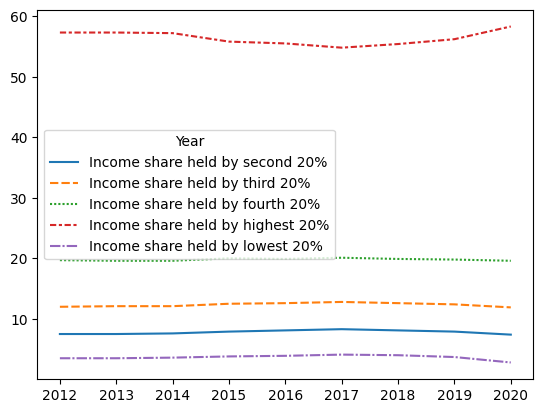

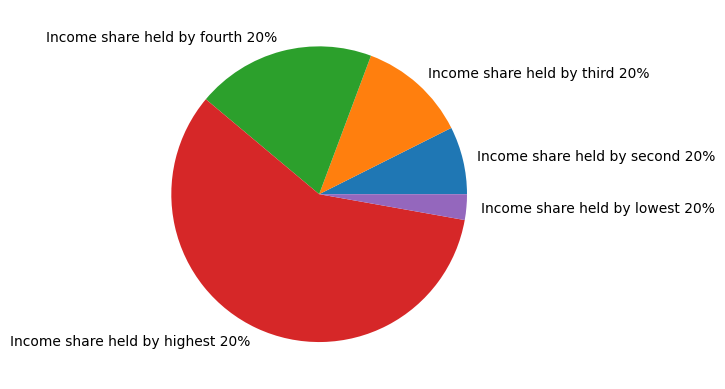

In [86]:
sns.lineplot(data=income_col)
plt.figure()
plt.pie(x=income_col.iloc[-1],labels=income_col.columns)

Now that we created the plot, we are going to create a **function** that can do it for any country code.

In [87]:
def income_plot(countries): # Receives a dataframe with countries
    country = countries.sample().values.tolist()[0]
    df_country = df[df['Country Code']==country[0]]
    income_share_series = ['SI.DST.FRST.20','SI.DST.02ND.20','SI.DST.03RD.20','SI.DST.04TH.20','SI.DST.05TH.20']
    income = df_country.loc[df_country['Series Code'].isin(income_share_series)]
    income.drop(columns=['Series Code', 'Country Name','Country Code', 1990,2000,2021],inplace=True)
    while(income.isna().values.any()):
        country = countries.sample().values.tolist()[0]
        df_country = df[df['Country Code']==country[0]]
        income_share_series = ['SI.DST.FRST.20','SI.DST.02ND.20','SI.DST.03RD.20','SI.DST.04TH.20','SI.DST.05TH.20']
        income = df_country.loc[df_country['Series Code'].isin(income_share_series)]
        income.drop(columns=['Series Code', 'Country Name','Country Code', 1990,2000,2021],inplace=True)
    income = income.T
    income.columns = income.iloc[0]
    income = income.tail(-1)
    print(income.isna().values.any())
    sns.lineplot(data=income)
    plt.title(f"Last decade's income share in {country[1]}")
    plt.figure()
    plt.pie(x=income.iloc[-1],labels=income.columns,autopct="%.1f%%")
    plt.title(f"2020 income share for {country[1]}")

C:\Users\acer\AppData\Local\Temp\ipykernel_428\2905580760.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income.drop(columns=['Series Code', 'Country Name','Country Code', 1990,2000,2021],inplace=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_428\2905580760.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income.drop(columns=['Series Code', 'Country Name','Country Code', 1990,2000,2021],inplace=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_428\2905580760.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.p

False


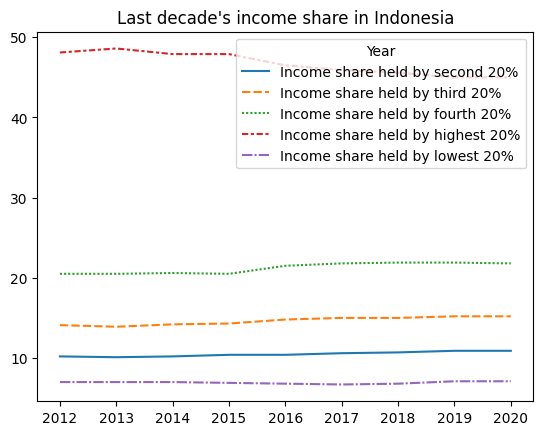

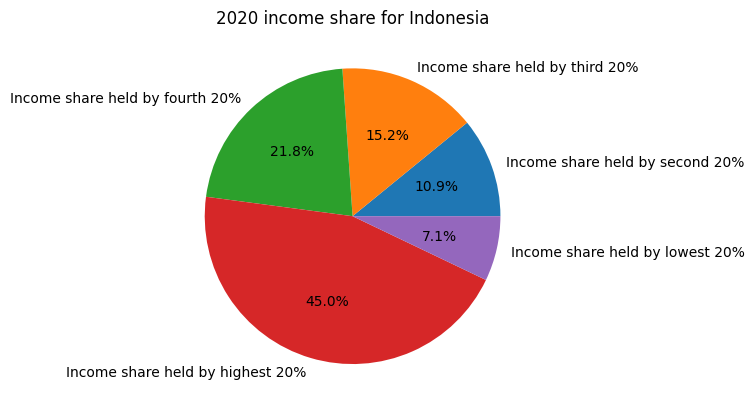

In [88]:
#country = countries.sample().values.tolist()[0]
#country = ['COL','Colombia']
income_plot(countries)